###  CASE STUDY - Craft a Story from a Dataset

In this case stuydy we examine the mileage dataset from the UCI Machine Learning Repository. There are a total of 8 features used to predict the mileage of each vehicle which are the number of cylinders, displacement, horsepower, weight, acceleration, model year , origin and car name(unique for each instance).

1. Import relevant packages

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
import seaborn as sns

2. Load Data

In [3]:
df = pd.read_csv('mpg.csv')

3, Examine data frame

In [53]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


4. Examine data types

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

5. Examine for missing data

In [54]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

6. Create new data frame with without car name column

In [15]:
X = df.iloc[:,:8]

7. Examine new data frame

In [16]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


8. Get statistics for each  column

In [17]:
X.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.434673,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.382990,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,94.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,128.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


9. Find Car with highest mpg

In [18]:
df.loc[df['mpg'] == 46.6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


10. Find Car with lowest mpg

In [19]:
df.loc[df['mpg'] == 9]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d


11. Find the distribution of mpg

Text(0, 0.5, 'frequency')

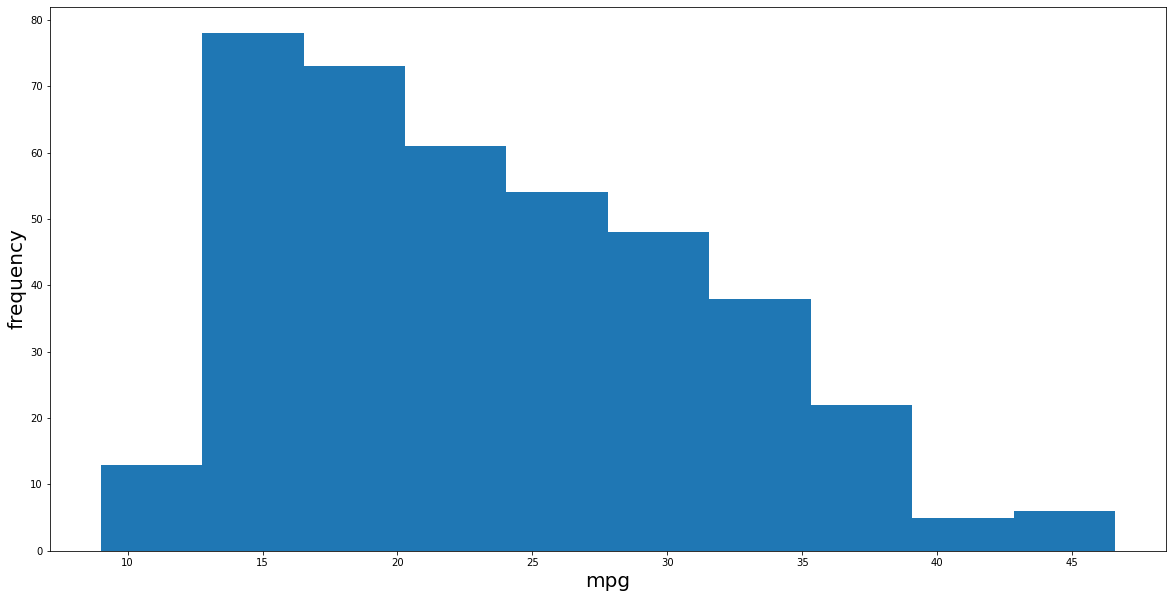

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
X.mpg.plot(kind="hist",ax=ax)
plt.xlabel('mpg', fontsize=20)
plt.ylabel('frequency', fontsize=20)

12. Correlation plot for each Column

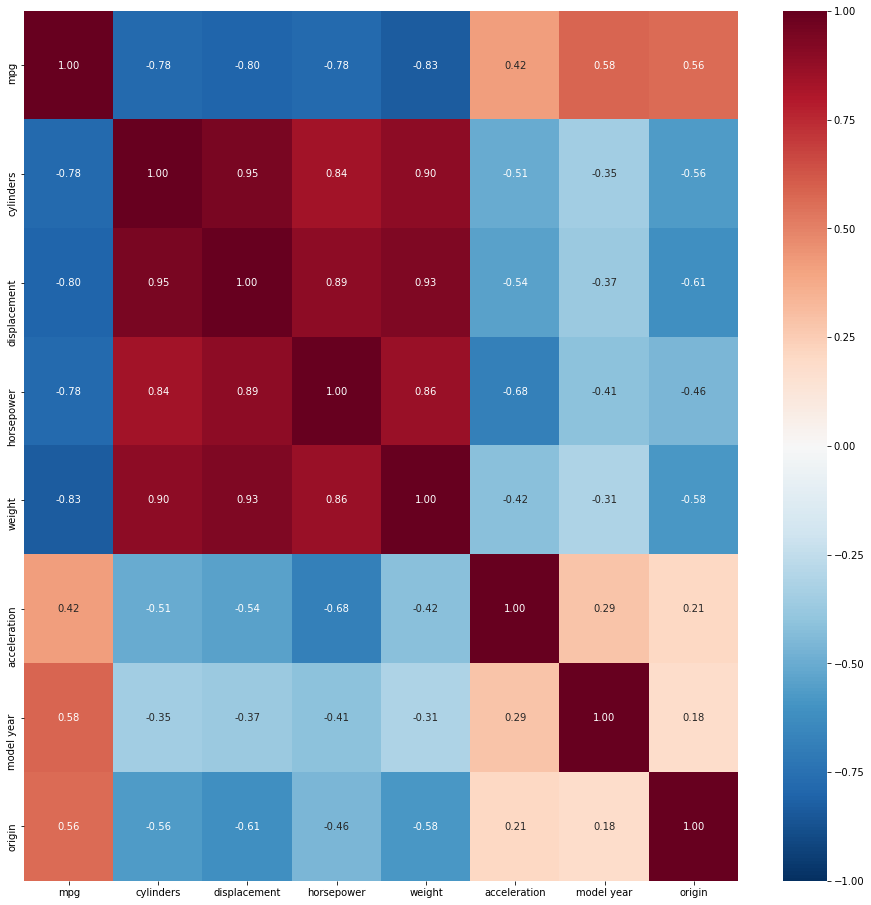

In [39]:
fig, ax = plt.subplots(figsize=(16,16))
ax = heatmap(X.corr(),fmt=".2f",annot=True,ax=ax,cmap="RdBu_r",vmin=-1,vmax=1)

As expected mpg is negatively correlated with weight, horsepower and displacement (more power and heavier weight means higher fuel consumption). On the other hand acceleration is positively correlated with mpg which is counterintuittive. Another interesting trend is the positive correlation between model year and mpg (Trend towards higher mileage as years go by).

13. Box Plot for mpg

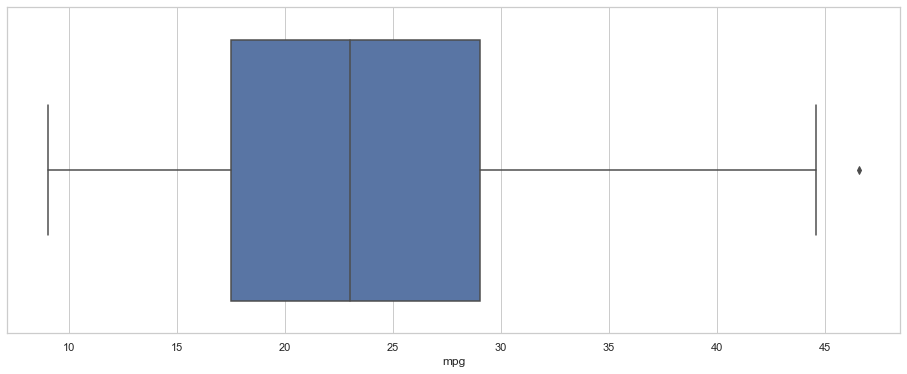

In [52]:
plt.figure(figsize=(16,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["mpg"])

The Mazda glc with an mpg of 46.6 is an outlier.

14. Scatterplot - mpg vs cylinders

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

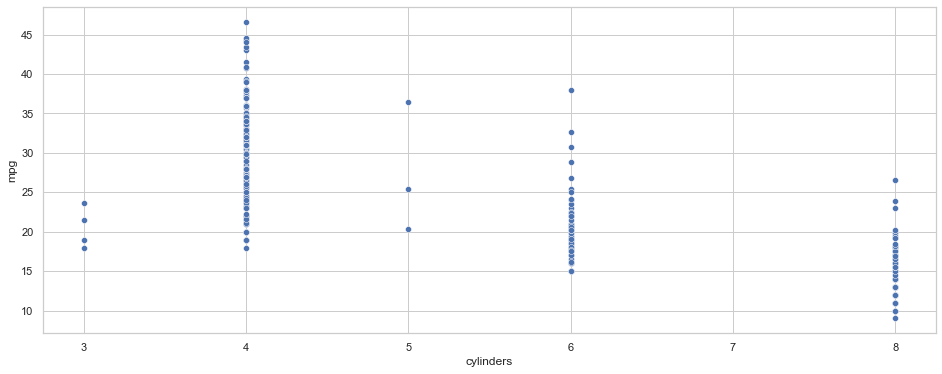

In [56]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="cylinders", y="mpg")

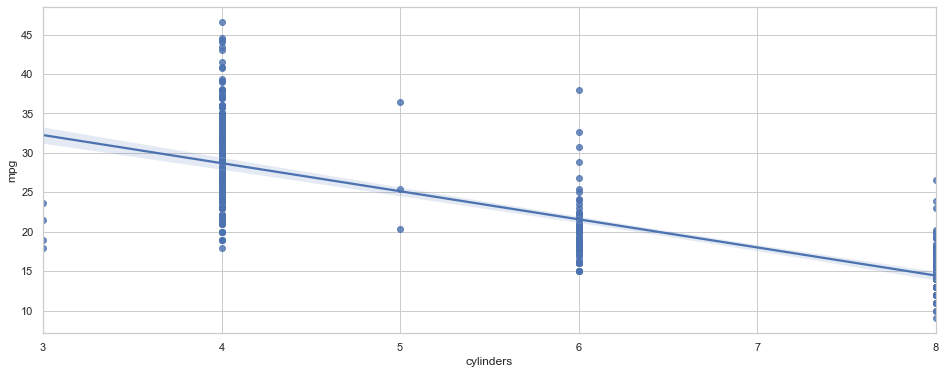

In [60]:
plt.figure(figsize=(16,6))
ax = sns.regplot(x="cylinders", y="mpg", data=df)

Majority of the high mpg vehicles have 4 cylinders. From the regression line we can see a negative correlation between mp and number of cylinders.

15. Scatter Plots

<AxesSubplot:xlabel='model year', ylabel='mpg'>

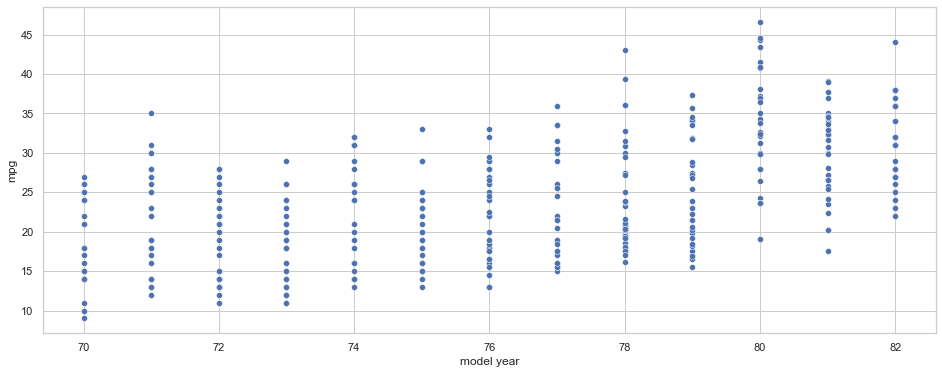

In [61]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="model year", y="mpg")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

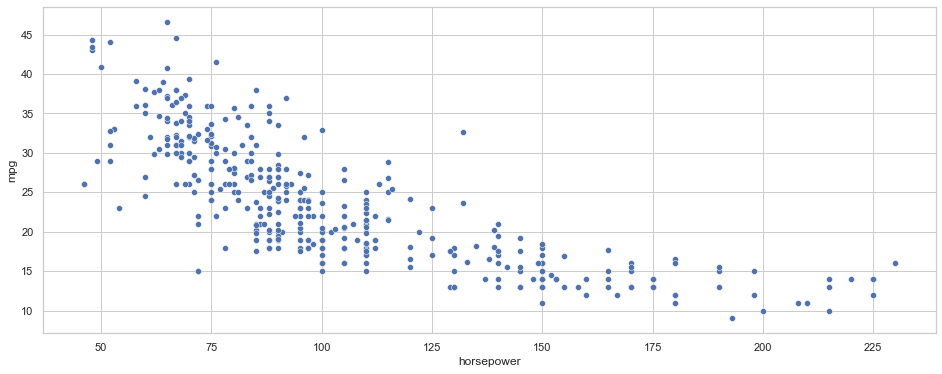

In [62]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="horsepower", y="mpg")

There is an exponential decline relationship between mpg and horsepower.

<AxesSubplot:xlabel='weight', ylabel='mpg'>

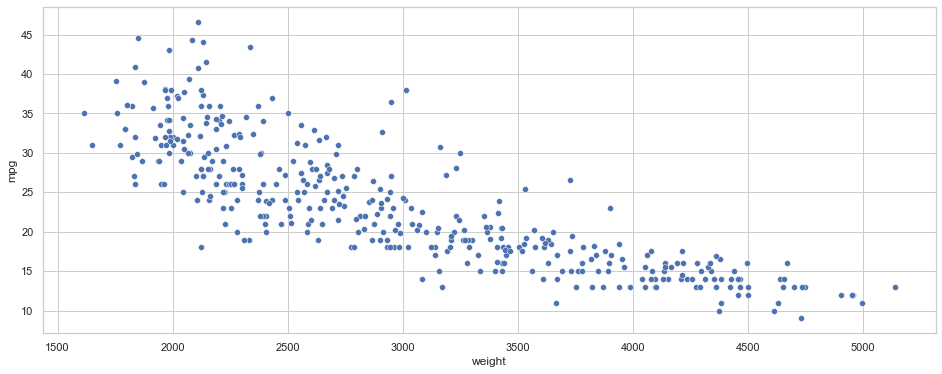

In [63]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="weight", y="mpg")

There is an exponential decline relationship between mpg and weight.

<AxesSubplot:xlabel='weight', ylabel='acceleration'>

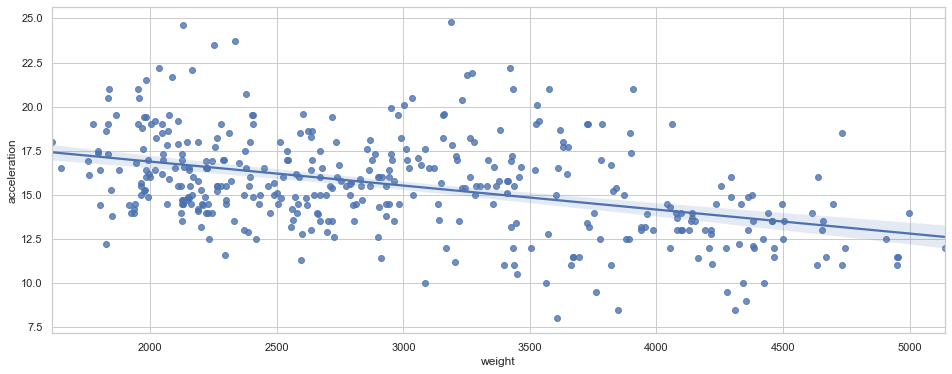

In [73]:
plt.figure(figsize=(16,6))
sns.regplot(data=df, x="model year", y="")

16. Examining mpg by geography

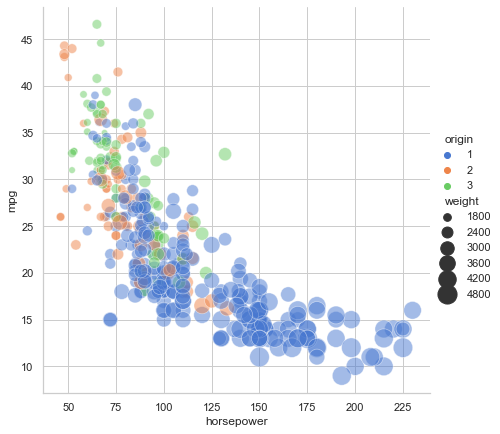

In [78]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

The USA consistently produce the lowest mpg, highest weight and most powerful vehicles( Origin = 1). On the other hand Japan (Origin = 2) and Europe (Origin = 3) produce the highest mpg vehicles.

17. Conclusion

There is a strong correlation between mpg and horsepower. This makes perfect sense since high horsepower vehicles tend to be heavier and thus have more cylinders. As can be seen from the final scatter plot majority of the high horsepower/lower mpg were made in the USA. The highest mpg vehicle is the mazda glc which has an mpg of 46.6 which was ahead of its time which is double the mean mpg of the group which is 23.5. 